<a href="https://colab.research.google.com/github/noreallyimfine/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Copy_of_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [53]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

In [54]:
##### Your Code Here #####
# See what features we have
df.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [0]:
# Check for null values
df.isnull().sum()

In [0]:
# Drop ID column and colummn full of NaNs
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [56]:
# And double check our columns
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [64]:
# Look at some summary statistics
df.describe()

((569, 30),
        radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
 count   569.000000    569.000000  ...      569.000000               569.000000
 mean     14.127292     19.289649  ...        0.290076                 0.083946
 std       3.524049      4.301036  ...        0.061867                 0.018061
 min       6.981000      9.710000  ...        0.156500                 0.055040
 25%      11.700000     16.170000  ...        0.250400                 0.071460
 50%      13.370000     18.840000  ...        0.282200                 0.080040
 75%      15.780000     21.800000  ...        0.317900                 0.092080
 max      28.110000     39.280000  ...        0.663800                 0.207500
 
 [8 rows x 30 columns])

In [33]:
# Standardize our data
zeroed = df - df.mean()
centered = zeroed / df.std()

# Extract eigen values
values, _ = np.linalg.eig(centered.cov())

# Brute force calculated how many eigenvalues make up >90% of total
thresh = sum(values[:7]) / sum(values)
thresh


0.9100953006967311

The first 7 values of our eigenvalues account for 91% of the principal component values

In [0]:
# Elbow Plot Data
sum_of_sq_dist = []
K = range(1,30)

for k in K:
  km = KMeans(n_clusters=k)
  km.fit(df)
  sum_of_sq_dist.append(km.inertia_)

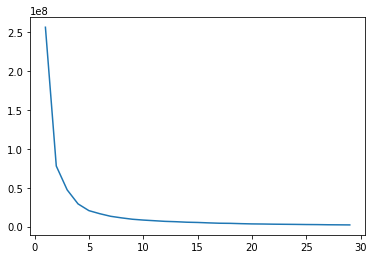

In [93]:
# Elbow Plot
plt.plot(K, sum_of_sq_dist);

In [82]:
# Ran the PCA to leave myself with 2 values
pca = PCA(2)

pca.fit(centered)

B = pca.transform(centered)

B

array([[ 9.18475521,  1.94687003],
       [ 2.38570263, -3.76485906],
       [ 5.72885549, -1.07422859],
       ...,
       [ 1.25507494, -1.90062436],
       [10.36567336,  1.67054021],
       [-5.4704299 , -0.67004722]])

In [99]:
# Calculate 7 clusters from eigenvalue data
kmeans = KMeans(n_clusters=7)
kmeans.fit(B)

labels = kmeans.labels_
print(labels)

[4 0 0 2 0 6 0 6 6 2 5 6 4 5 2 6 5 6 0 5 1 1 6 0 0 4 6 0 6 5 0 6 6 0 6 6 6
 3 5 5 3 1 4 6 5 0 3 6 3 5 3 3 3 0 5 3 0 6 3 1 1 1 6 1 6 6 1 3 2 3 0 2 6 5
 3 5 1 6 4 3 1 6 4 6 1 0 5 0 1 6 5 5 3 3 6 0 3 3 3 5 5 1 3 1 1 6 1 3 4 1 1
 1 6 1 1 1 1 6 6 5 3 0 4 5 3 3 5 0 6 0 1 5 5 5 0 3 3 3 6 1 3 5 1 3 3 1 2 1
 5 3 1 2 2 3 1 3 0 5 3 3 1 0 0 1 0 3 3 5 0 3 3 5 6 1 3 3 2 6 3 3 4 4 5 1 5
 3 5 3 3 3 2 3 3 6 6 3 6 5 0 5 1 5 4 6 1 5 1 5 1 3 0 3 4 6 6 6 1 1 0 0 3 1
 1 6 3 5 3 5 5 6 6 3 3 0 3 3 4 0 5 0 3 3 2 3 0 1 3 6 1 1 4 3 4 5 0 5 0 6 4
 6 0 5 0 5 5 0 1 3 3 1 3 3 4 1 5 1 3 5 3 3 0 3 0 6 5 3 1 3 1 3 6 5 1 3 3 3
 3 3 3 3 0 1 4 3 3 3 3 3 3 3 3 3 3 3 1 3 3 0 2 3 1 0 1 4 3 3 3 3 6 6 5 1 1
 3 3 0 1 0 1 0 5 1 1 0 1 1 3 5 3 1 3 2 4 6 3 1 1 3 1 3 3 3 3 5 3 0 0 3 0 0
 6 3 0 0 3 5 2 3 1 2 1 3 1 1 3 5 1 3 1 0 3 1 6 4 1 3 5 3 3 3 6 3 3 3 3 1 5
 1 0 3 3 3 3 5 5 1 1 0 3 3 1 6 1 5 1 3 1 1 3 3 6 1 0 0 3 5 3 3 3 3 1 0 3 3
 5 1 0 5 5 0 1 0 3 5 3 3 1 3 3 3 0 4 3 3 3 6 5 3 6 6 1 3 5 3 1 3 5 3 1 6 3
 3 1 3 5 6 3 0 1 5 3 5 0 

In [95]:
# New column with cluster labels
df['clusters'] = labels
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters,two_clusters,three_clusters
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2,0,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,2,0,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,2,0,1


In [0]:
# 2 clusters bec elbow plot 
kmeans = KMeans(n_clusters=2)
kmeans.fit(B)

labels = kmeans.labels_
df['two_clusters'] = labels

In [0]:
# 3 clusters also bec elbow plot
kmeans = KMeans(n_clusters=3)
kmeans.fit(B)

labels = kmeans.labels_
df['three_clusters'] = labels

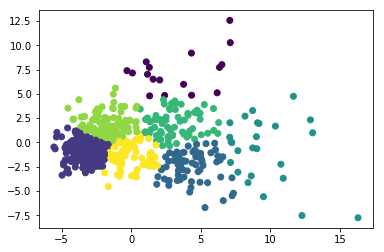

In [100]:
# Plot them with 7 clusters (using my eigenvalues method)
plt.scatter(B[:, 0], B[:,1], c=df['clusters']);

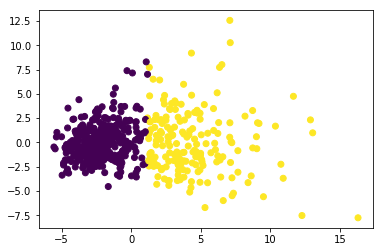

In [86]:
# Plot it using just 2 clusters bec the elbow plot looks closer to 2
plt.scatter(B[:, 0], B[:,1], c=df['two_clusters']);

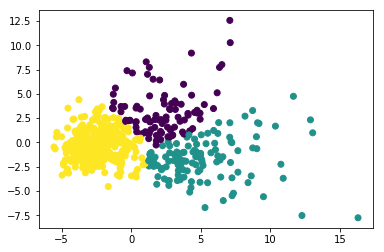

In [91]:
# Plot it using just 3 clusters bec the elbow plot could be 3 or 4
plt.scatter(B[:, 0], B[:,1], c=df['three_clusters']);

# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.